<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Regressão
Caderno de **Aula**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Regressão;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Aulas**

## 0\. Abordagens estatísticas

*   **Descritiva**: foco no passado para entender o **presente**.
*   <font color='red'>**Preditiva**</font>: foca no passado para inferir o **futuro**.

## 1\. Regressão

### **1.1. Motivação** 

> Dado a **altura** de um jogador, qual deve ser seu **peso**?

Queremos uma equação matemática que represente esta relação. Uma possível equação seria a equação linear de primero grau:

 > $y = f(x) = \textbf{a}x + \textbf{b}$

O número $\textbf{a}$ é chamado de coeficiente angular e controla a inclinação da reta, já o número $\textbf{b}$ é chamado de coeficiente linear e indica o deslocamento horizontal da reta. A idéia é predizer o peso que um atleta deve ter dado a sua altura, ou seja:

 > $peso = f(altura) = \textbf{a}(altura) + \textbf{b}$

Qual o melhor valor de $\textbf{a}$ e $\textbf{b}$ para esse conjunto de dados?

### **1.2. Regressão Linear** 

A regressão linear é um abordagem estatística que busca encontrar a relaçao entre um atributo alvo $y$ (variável resposta) e um conjunto de atributos preditores $x_i$ através de uma linha reta (em uma ou mais dimensões), relação essa preferencialmente **causal**. De maneira geral, busca encontrar $\textbf{a}_i$ e $\textbf{b}$ tal que:

 > $y = f(x_i) = (\sum_{i=1}^{n} \textbf{a}_ix_i) + \textbf{b}$ 

Para apenas uma dimensão ou um atributo, temos: 

 > $y = f(x_1) = \textbf{a}_1x_1 + \textbf{b}$ 

- **Exemplo**: peso como função da altura.

 > $peso = f(altura) = \textbf{a}(altura) + \textbf{b}$

Através do **treino** do modelo, encontra-se os valores de $\textbf{a}$ e $\textbf{b}$ que melhor se ajustam a um conjunto de dados.

### **1.3. Pacote Scikit-Learn** 

Pacote Python para ciência de dados e *machine learning*. A documentação pode ser encontrada neste [link](https://scikit-learn.org/stable/). Possuí diversos modelos para aprendizado supervisionado, não supervisionado, etc. além de métodos auxiliares. Para regressão linear, temos:

In [167]:
from sklearn.linear_model import LinearRegression

In [168]:
model = LinearRegression()

## 2\. Dados

### **2.1. Pré-processamento** 

Neste módulo, vamos utilizar dados sobre o salário mensal em dólares americados de jogadores da NBA em 2020. O conjunto de dados está neste [link](https://github.com/andre-marcos-perez/ebac-course-utils/blob/main/dataset/nba.csv) e é uma cópia do conjunto de dados do Kaggle, presente neste [link](https://www.kaggle.com/isaienkov/nba2k20-player-dataset). 

In [169]:
!wget -q "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/nba.csv" -O nba.csv 

In [170]:
import numpy as np
import pandas as pd
import seaborn as sns

In [171]:
nba = pd.read_csv("nba.csv")

Vamos conhecer um pouco melhor o conjunto de dados.

In [172]:
nba.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State


In [173]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_name    429 non-null    object
 1   rating       429 non-null    int64 
 2   jersey       429 non-null    object
 3   team         406 non-null    object
 4   position     429 non-null    object
 5   b_day        429 non-null    object
 6   height       429 non-null    object
 7   weight       429 non-null    object
 8   salary       429 non-null    object
 9   country      429 non-null    object
 10  draft_year   429 non-null    int64 
 11  draft_round  429 non-null    object
 12  draft_peak   429 non-null    object
 13  college      363 non-null    object
dtypes: int64(2), object(12)
memory usage: 47.0+ KB


In [174]:
nba.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,429.0,76.37296,5.657748,67.0,72.0,75.0,79.0,97.0
draft_year,429.0,2014.09324,3.937678,2001.0,2012.0,2015.0,2017.0,2019.0


In [175]:
nba.drop(["rating", "draft_year"], axis=1).describe()

,full_name,jersey,team,position,b_day,height,weight,salary,country,draft_round,draft_peak,college
count,429,429,406,429,429,429,429,429,429,429,429,363
unique,429,52,30,7,415,20,84,308,39,3,57,111
top,LeBron James,#0,Milwaukee Bucks,G,09/19/96,6-6 / 1.98,215 lbs. / 97.5 kg.,$1416852,USA,1,Undrafted,Kentucky
freq,1,79,17,169,2,50,23,20,323,257,67,26


Vamos selecionar os atributos que podem estar relacionados com o salário de um jogador e manipular um a um. Como estamos modelando o problema como se o peso fosse uma função exclusiva da altura de um jogador, temos:

In [176]:
data = nba[["weight", "height"]]

In [177]:
data.head()

,weight,height
0,250 lbs. / 113.4 kg.,6-9 / 2.06
1,225 lbs. / 102.1 kg.,6-7 / 2.01
2,242 lbs. / 109.8 kg.,6-11 / 2.11
3,230 lbs. / 104.3 kg.,6-10 / 2.08
4,220 lbs. / 99.8 kg.,6-5 / 1.96


 - **Height**: Atributo numérico, formatar e padronizar.

In [178]:
data[['height']].head()

,height
0,6-9 / 2.06
1,6-7 / 2.01
2,6-11 / 2.11
3,6-10 / 2.08
4,6-5 / 1.96


**$\ast$ Recapitulando o método *split***

In [179]:
var_s = "ab-cd"
ab = var_s.split(sep='-')[0].strip()
cd = var_s.split(sep='-')[-1].strip()

print(ab)
print(cd)

ab
cd


In [180]:
data['height'] = data['height'].apply(lambda height: float(height.split(sep='/')[-1].strip()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [181]:
data[['height']].describe().T

,count,mean,std,min,25%,50%,75%,max
height,429.0,1.995641,0.083514,1.75,1.93,2.01,2.06,2.24


 - **Weight**: Variável resposta numérica, formatar.



In [182]:
data[['weight']].head()

,weight
0,250 lbs. / 113.4 kg.
1,225 lbs. / 102.1 kg.
2,242 lbs. / 109.8 kg.
3,230 lbs. / 104.3 kg.
4,220 lbs. / 99.8 kg.


In [183]:
data['weight'] = data['weight'].apply(lambda weight: float(weight.split(sep='/')[-1].split(sep='kg')[0].strip()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [184]:
data[['weight']].describe().T

,count,mean,std,min,25%,50%,75%,max
weight,429.0,97.219814,10.536428,77.1,89.4,96.6,104.3,131.5


O resultado do pré-processamento nos trás um dado limpo e pronto para ser utilizado no treino do modelo.

In [185]:
data.head()

,weight,height
0,113.4,2.06
1,102.1,2.01
2,109.8,2.11
3,104.3,2.08
4,99.8,1.96


### **2.2. Treino / Teste** 

De maneira geral, um modelo de aprendizagem supervisionada precisa ser treinado com um conjunto de dados e avaliado com outro, assim conseguimos enter um pouco melhor a capacidade do modelo em **generalizar** as predições com dados não visto, que é a situação real em que será utilizado. Para tanto, dividimos nossa base de dados em duas: uma maior de **treino** e uma menor de **testes**.

In [186]:
from sklearn.model_selection import train_test_split

In [187]:
predictors_train, predictors_test, target_train, target_test = train_test_split(
    data.drop(['weight'], axis=1), 
    data['weight'], 
    test_size=0.25, 
    random_state=123
)

 - **Variáveis preditoras (predictors)**

In [188]:
predictors_train.head()

,height
200,2.03
0,2.06
337,1.91
148,1.98
349,2.11


In [189]:
predictors_train.shape

(321, 1)

In [190]:
predictors_test.head()

,height
13,1.98
266,2.08
330,2.13
220,2.01
240,2.03


In [191]:
predictors_test.shape

(108, 1)

 - **Variável resposta (target)**

In [192]:
target_train.head()

200    108.9
0      113.4
337     82.1
148     94.8
349    113.4
Name: weight, dtype: float64

In [193]:
target_train.shape

(321,)

In [194]:
target_test.head()

13      93.0
266     99.8
330     98.0
220    111.1
240    101.6
Name: weight, dtype: float64

In [195]:
target_test.shape

(108,)

## 3\. Treino

O treino de modelos de aprendizagem supervisionada consiste na etapa de calculo dos coeficientes do modelo baseado na associação da variável resposta com os variáveis preditoras através do uso de um ou mais algoritmos. No caso da regressão linear, estamo interessados em definir os valores de $\textbf{a}_i$ e $\textbf{b}$:

 > $y = f(x_i) = (\sum_{i=1}^{n} \textbf{a}_ix_i) + \textbf{b}$ 

### **3.1. Algoritmo** 

O treino de um modelo de regressão linear é feito através do uso do método de gradiente (explicação neste [link](https://en.wikipedia.org/wiki/Gradient_descent)). A explicação do algoritmo foge do escopo desse curso mas a idéia é que busca-se minimizar a diferença entre os pontos e a reta definida por $\textbf{a}_i$ e $\textbf{b}$, ou seja, encontrar os valores de $\textbf{a}_i$ e $\textbf{b}$ que define a reta que esta mais "perto" de todos os pontos da base de dados de treino.

In [196]:
model = model.fit(predictors_train, target_train)

In [197]:
model.__dict__

{'_residues': 15615.686282736986,
 'coef_': array([88.97464703]),
 'copy_X': True,
 'feature_names_in_': array(['height'], dtype=object),
 'fit_intercept': True,
 'intercept_': -80.263088457123,
 'n_features_in_': 1,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False,
 'rank_': 1,
 'singular_': array([1.49222304])}

In [198]:
a = model.coef_
print(a)

[88.97464703]


In [199]:
b = model.intercept_
print(b)

-80.263088457123


Logo, temos:

 > $y = f(x) = \textbf{a}x + \textbf{b}$ 

 > $peso = f(altura) = \textbf{a}(altura) + \textbf{b}$

 > $peso = f(altura) = \textbf{88.9746} * (altura) - \textbf{80.2631}$

Com o modelo treinado, estamos prontos para fazer predições.

In [200]:
data.head(1)

,weight,height
0,113.4,2.06


In [201]:
altura = 2.06
peso = (a * altura) + b

print(peso)

[103.02468443]


In [202]:
altura = np.array([2.06])
peso = model.predict(altura.reshape(-1, 1))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [203]:
peso

array([103.02468443])

## 4\. Avaliação

Para enter o poder preditivo do modelo de aprendizagem supervisionada, precisamos avaliar sua capacidade de generalização, ou seja, avalivar as predições em dados "não vistos" na etapa de treino. Comparamos então as predições com os dados reais através de uma métrica.

 - **Salário predito**

In [204]:
target_predicted = model.predict(predictors_test)

In [205]:
target_predicted[0:5]

array([ 95.90671266, 104.80417737, 109.25290972,  98.57595208,
       100.35544502])

In [206]:
target_predicted.shape

(108,)

 - **Salário teste**

In [207]:
target_test[0:5]

13      93.0
266     99.8
330     98.0
220    111.1
240    101.6
Name: weight, dtype: float64

In [208]:
target_test.shape

(108,)

### **4.1. RMSE** 

Do inglês *root mean square error* ou raíz quadrada do erro quadrático médio, o RMSE mede a diferença média absoluta entre os valores preditos com os valores reais. O resultado pode ser interpretado com uma faixa de valor em que a predição varia do valor real, portanto, quando menor, melhor. Contudo, a definição de "menor" é particular para cada variável resposta devido a diferenças de escala.

 - Exemplo:

Um RMSE igual a 100 kg significa que a predição varia, na média, entre +/- 100 kg. Se a variável resposta for o peso de um carro (toneladas), esse valor é excelente. Contudo, se a variável resposta for o peso de uma motocicleta (centenas de kilos), esse valor pode ser muito alto.

O RMSE é definido como:

> $RMSE(y,\hat{y}) = \sqrt{\frac{\sum_{i=1}^{n} (y_i-\hat{y}_i)^{2}}{n}}$

In [209]:
from sklearn.metrics import mean_squared_error

In [210]:
rmse = np.sqrt(mean_squared_error(target_test, target_predicted))
print(rmse)

7.680474067138796


Para facilitar sua interpretação, vamos colocar numa gráfico os valores de reais de teste e os valores preditos.

In [211]:
test_data = pd.concat([predictors_test, pd.DataFrame(target_test, columns=['weight'])], axis=1).reset_index(drop=True)
test_data['predicted'] = False

In [212]:
test_data.head()

,height,weight,predicted
0,1.98,93.0,False
1,2.08,99.8,False
2,2.13,98.0,False
3,2.01,111.1,False
4,2.03,101.6,False


In [213]:
prediction_data = pd.concat([predictors_test.reset_index(drop=True), pd.DataFrame(target_predicted, columns=['weight'])], axis=1).reset_index(drop=True)
prediction_data['predicted'] = True

In [214]:
prediction_data.tail()

,height,weight,predicted
103,1.88,87.009248,True
104,1.93,91.457980,True
105,2.03,100.355445,True
106,1.91,89.678487,True
107,2.03,100.355445,True


In [215]:
prediction = pd.concat([test_data, prediction_data]).reset_index(drop=True)

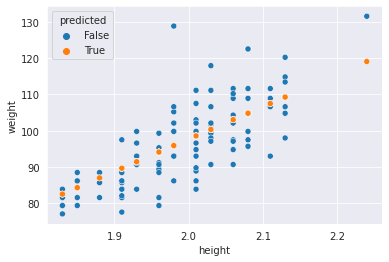

In [216]:
with sns.axes_style('darkgrid'):

  # peso = 88.9746 * altura - 80.2631
  sns.scatterplot(data=prediction, x='height', y='weight', hue='predicted')

### **4.2. Comparação** 

Um dos objetivos de métricas de avaliação de modelos é comparar a qualidade de diferentes modelos. Para ilustrar, vamos construir uma segunda versão do modelo que utiliza um atributo a mais, a posição do jogador. A hipótese é que posições diferentes exigem alturas e pesos diferentes.

In [217]:
data = nba[['weight', 'height', 'position']]
data.head()

,weight,height,position
0,250 lbs. / 113.4 kg.,6-9 / 2.06,F
1,225 lbs. / 102.1 kg.,6-7 / 2.01,F
2,242 lbs. / 109.8 kg.,6-11 / 2.11,F-G
3,230 lbs. / 104.3 kg.,6-10 / 2.08,F
4,220 lbs. / 99.8 kg.,6-5 / 1.96,G


 - **Position**: Atributo categórico nominal, one-hot encoding.

In [218]:
data["position"].drop_duplicates()

0       F
2     F-G
4       G
6     F-C
9       C
20    G-F
44    C-F
Name: position, dtype: object

In [219]:
data['position_f'] = data['position'].apply(lambda position: 1 if position == 'F' else 0)
data['position_g'] = data['position'].apply(lambda position: 1 if position == 'G' else 0)
data['position_c'] = data['position'].apply(lambda position: 1 if position == 'C' else 0)
data['position_fg'] = data['position'].apply(lambda position: 1 if position == 'F-G' else 0)
data['position_fc'] = data['position'].apply(lambda position: 1 if position == 'F-C' else 0)
data['position_gf'] = data['position'].apply(lambda position: 1 if position == 'G-F' else 0)
data['position_cf'] = data['position'].apply(lambda position: 1 if position == 'C-F' else 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [220]:
data[['position', 'position_f', 'position_g', 'position_c', 'position_fg', 'position_fc', 'position_gf', 'position_cf']].head()

,position,position_f,position_g,position_c,position_fg,position_fc,position_gf,position_cf
0,F,1,0,0,0,0,0,0
1,F,1,0,0,0,0,0,0
2,F-G,0,0,0,1,0,0,0
3,F,1,0,0,0,0,0,0
4,G,0,1,0,0,0,0,0


In [221]:
data = data.drop(['position'], axis=1)

 - **Height**: Atributo numérico, formatar e padronizar.

In [222]:
data['height'] = data['height'].apply(lambda height: float(height.split(sep="/")[-1].strip()))

altura_media = data['height'].mean()
altura_desvio_padrao = data['height'].std()

data['height'] = data['height'].apply(lambda height: (height - altura_media) / altura_desvio_padrao)

 - **Weight**: Variável resposta numérica, formatar.



In [223]:
data["weight"] = data["weight"].apply(lambda weight: float(weight.split(sep="/")[-1].split(sep="kg")[0].strip()))

In [224]:
data.head()

,weight,height,position_f,position_g,position_c,position_fg,position_fc,position_gf,position_cf
0,113.4,0.770634,1,0,0,0,0,0,0
1,102.1,0.171934,1,0,0,0,0,0,0
2,109.8,1.369333,0,0,0,1,0,0,0
3,104.3,1.010114,1,0,0,0,0,0,0
4,99.8,-0.426765,0,1,0,0,0,0,0


 - **Treino**

In [225]:
predictors_train, predictors_test, target_train, target_test = train_test_split(
    data.drop(['weight'], axis=1), 
    data['weight'], 
    test_size=0.25, 
    random_state=123
)

In [226]:
model_v2 = model.fit(predictors_train, target_train)
model_v2.__dict__

{'_residues': array([], dtype=float64),
 'coef_': array([ 3.51031289,  0.42821737, -6.91455581,  6.6325834 , -3.72005395,
         2.76212644, -3.04719877,  3.85888132]),
 'copy_X': True,
 'feature_names_in_': array(['height', 'position_f', 'position_g', 'position_c', 'position_fg',
        'position_fc', 'position_gf', 'position_cf'], dtype=object),
 'fit_intercept': True,
 'intercept_': 99.07105131057611,
 'n_features_in_': 8,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False,
 'rank_': 7,
 'singular_': array([1.95434384e+01, 9.26305551e+00, 5.49363996e+00, 4.70938191e+00,
        3.76700509e+00, 3.19445730e+00, 2.43995980e+00, 1.58582517e-15])}

Dessa vez, estamos buscando uma reta multidimensional, portanto:

 > $y = f(x_i) = (\sum_{i=1}^{n} \textbf{a}_ix_i) + \textbf{b}$ 

In [227]:
a = model_v2.coef_
print(a)

[ 3.51031289  0.42821737 -6.91455581  6.6325834  -3.72005395  2.76212644
 -3.04719877  3.85888132]


In [228]:
b = model_v2.intercept_
print(b)

99.07105131057611


 > $peso = f(altura, posicao_f, ...) = \textbf{a}_1(altura) + \textbf{a}_2(posicao_f) + ... + \textbf{b}$

 > $peso = f(altura, posicao_f, ...) = \textbf{3.5103}(altura) + \textbf{0.4282}(posicao_f) + ... + \textbf{99.0711}$

 - **Avaliação**

In [229]:
target_predicted = model_v2.predict(predictors_test)

In [230]:
rmse_v2 = np.sqrt(mean_squared_error(target_test, target_predicted))
print(rmse_v2)

7.267852030433409


Com o RMSE para ambas as versões do modelo, podemos compara-los.

 > **RMSE v1**: 7.680474067138796
 > 
 > **RMSE v2**: 7.267852030433409

In [231]:
print(f"Melhoria de {round(100 * (1 - (rmse_v2 / rmse)), 2)}%")

Melhoria de 5.37%


Podemos observar a melhoria de performance num gráfico.

In [232]:
test_data = pd.concat([predictors_test, pd.DataFrame(target_test, columns=['weight'])], axis=1).reset_index(drop=True)
test_data['predicted'] = False

prediction_data = pd.concat([predictors_test.reset_index(drop=True), pd.DataFrame(target_predicted, columns=['weight'])], axis=1).reset_index(drop=True)
prediction_data['predicted'] = True

prediction_v2 = pd.concat([test_data, prediction_data]).reset_index(drop=True)


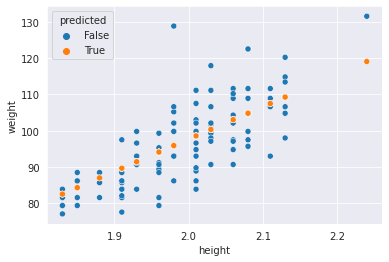

In [234]:
with sns.axes_style('darkgrid'):

  # peso = 88.9746 * altura - 80.2631
  sns.scatterplot(data=prediction, x='height', y='weight', hue='predicted')

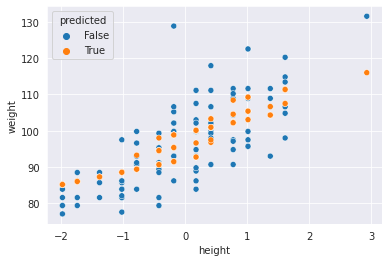

In [235]:
with sns.axes_style('darkgrid'):

  # peso = 3.51031289 * altura + 0.42821737 * posicao_f + ... + 99.07105131057611
  sns.scatterplot(data=prediction_v2, x='height', y='weight', hue='predicted')

## 5\. Predição

Com o modelo treinado, avaliado e selecionado, podemos utiliza-lo para resolver os problemas reais que motivaram sua construção, para tanto para criar um exemplo pré-processado e utilizar o modelo para realizar a predição.

> **Atenção**: O exemplo precisa seguir o mesmo pré-processamento realizado na construção do modelo.

 - **Exemplo**: Pivô com 2.05m e 99 kg.

In [236]:
data.head(1)

,weight,height,position_f,position_g,position_c,position_fg,position_fc,position_gf,position_cf
0,113.4,0.770634,1,0,0,0,0,0,0


In [237]:
altura_padronizada = (2.05 - altura_media) / altura_desvio_padrao
print(altura_padronizada)

0.6508938262870723


In [238]:
jogador = np.array([altura_padronizada, 0, 0, 1, 0, 0, 0, 0])

In [239]:
print(jogador)

[0.65089383 0.         0.         1.         0.         0.
 0.         0.        ]


In [244]:
peso = model_v2.predict(jogador.reshape(1, -1))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [242]:
print(peso)

[107.9884757]


Conclui-se que o jogador **precisa** ganhar peso para atuar como pivô.

 - **Exemplo**: Atacante com 2.05m e 99 kg.

In [ ]:
data.head(1)

,weight,height,position_f,position_g,position_c,position_fg,position_fc,position_gf,position_cf
0,113.4,0.770634,1,0,0,0,0,0,0


In [ ]:
altura_padronizada = (2.05 - altura_media) / altura_desvio_padrao
print(altura_padronizada)

0.6508938262870723


In [ ]:
jogador = np.array([altura_padronizada, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
peso = model_v2.predict(jogador.reshape(1, -1))
print(peso)

[101.78410967]


Conclui-se que o jogador **não precisa** ganhar peso para atuar como atacante.